<a href="https://colab.research.google.com/github/KSNW/sentimental_analysis/blob/main/sentimental_analysis_project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing, Cleaning, Feature Extracting and Sentiment Analysis

To analyze Twitter data accurately, crucial steps such as data processing, cleaning, and sentiment analysis must be taken. Raw data collected from Twitter can contain noise, irrelevant information, and duplicates, which can impact the analysis's accuracy.

Cleaning the data involves removing the noise and irrelevant information present in the raw data. Various techniques can be used for this, such as text normalisation, stop-word removal, and stemming. Text normalisation involves converting text to a standardised form to remove any variations present, such as converting "don't" to "do not." Stop words, which are common words like "the" and "and," can be removed from the text as they do not contribute much value to the analysis. Stemming involves reducing words to their base form to remove suffixes, such as converting "running" to "run."

After data cleaning, sentiment analysis can be performed to determine the sentiment of each tweet. This can be done using various techniques, such as rule-based methods, machine learning, or deep learning. Sentiment analysis can help identify positive, negative, or neutral tweets, which can provide insights into public opinion about a particular topic.

Moreover, data processing, cleaning, and sentiment analysis are essential steps in analyzing Twitter data to gain valuable insights. They help ensure the accuracy of the analysis and provide a better understanding of public opinion and behavior.

In [106]:
#avoid poping warning notices
import warnings
warnings.filterwarnings('ignore')

In [107]:
#importing libraries 
import pandas as pd
import numpy as np

Create a folder called "IGP_projects" in your google drive and run the code. When premorted give access to the gdrive

In [108]:
#Connecting to google drive.
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# get data from google drive
df=pd.read_csv('gdrive/MyDrive/IGP_project/qatar2022_tweets_26038.csv',parse_dates=['created_at'])
df.head()

,id,created_at,text,username
0,1637908592727654406,2023-03-20 20:06:54+00:00,#FIFA talks a good game but its actions show i...,ChristineJameis
1,1637907531396943872,2023-03-20 20:02:40+00:00,Don't miss out any favorite sports game.\n\n🔴L...,justano23327712
2,1637906995205361665,2023-03-20 20:00:33+00:00,A miracle journey...\n\nWhen someone tells you...,AlchDigi
3,1637904285928390658,2023-03-20 19:49:47+00:00,Take over #Qatar with our \n🔥 #WorldCup2022 St...,IvannaMcconnell
4,1637902385182851072,2023-03-20 19:42:14+00:00,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,Methodsbio012


# Preliminary Analysis of data 

In [7]:
df.columns

Index(['id', 'created_at', 'text', 'username'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26038 entries, 0 to 26037
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   id          26038 non-null  int64              
 1   created_at  26038 non-null  datetime64[ns, UTC]
 2   text        26038 non-null  object             
 3   username    26038 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 813.8+ KB


In [9]:
df.dtypes

id                          int64
created_at    datetime64[ns, UTC]
text                       object
username                   object
dtype: object

Checking for null values

In [10]:
np.sum(df.isnull().any(axis=1))

0

 Rows and columns in the dataset

In [11]:
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))


Count of columns in the data is:  4
Count of rows in the data is:  26038


### Data preprocessing

In [12]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# function to preprocess tweets
def preprocess_tweet(tweet, porterstemmer=False):
    # initialize tweet tokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

    tweet = tweet.split(': ')[-1]
    # tokenize tweet into individual words
    tweet_tokens = tokenizer.tokenize(tweet)
    
    # remove stopwords and punctuations
    stop_words = set(stopwords.words('english'))
    tweet_filtered = [word for word in tweet_tokens if not word in stop_words and word.isalpha()]
    
    # apply stemming
    if porterstemmer:
        stemmer = PorterStemmer()
        tweet_stemmed = [stemmer.stem(word) for word in tweet_filtered]
        
        # join tokens back into a string
        tweet_cleaned = ' '.join(tweet_stemmed)
        
    # join tokens back into a string
    else:
        tweet_cleaned = ' '.join(tweet_filtered)
    
    return tweet_cleaned


In [14]:
# example tweet
tweet = "Just had the best pizza ever! #yum #pizzalove 🔥!"

# preprocess tweet
tweet_cleaned = preprocess_tweet(tweet)

print('Original tweet: ', tweet)
print('Preprocess tweet: ',tweet_cleaned) # output: "best pizza ever"


Original tweet:  Just had the best pizza ever! #yum #pizzalove 🔥!
Preprocess tweet:  best pizza ever


In [16]:
#focusing on text column 
raw_tweets = df['text'].values

In [18]:
n = 9
print('[Raw tweet]:') 
print(raw_tweets[n])

print('\n[Clean tweet]:') 
print(preprocess_tweet(raw_tweets[n]))

[Raw tweet]:
Let’s take web3 to infinity and beyond 
Mass Adoption Champ 🚀🚀 
#WorldCup2022 #WomenInNFTs #womeninweb3 #codelessalpha #teachwomenweb3 https://t.co/xEtLZVoc0g

[Clean tweet]:
let take web infinity beyond mass adoption champ


In [19]:
# applying cleaning process to all raw data

clean_tweets = [preprocess_tweet(tweet) for tweet in raw_tweets]

print('done')

done


In [20]:
#creating new column with clean_tweets
df['clean_tweets'] = clean_tweets

In [21]:
#check the new table header
df.head()

,id,created_at,text,username,clean_tweets
0,1637908592727654406,2023-03-20 20:06:54+00:00,#FIFA talks a good game but its actions show i...,ChristineJameis,talks good game actions show trusted failed pr...
1,1637907531396943872,2023-03-20 20:02:40+00:00,Don't miss out any favorite sports game.\n\n🔴L...,justano23327712,miss favorite sports game live stream joyful iptv
2,1637906995205361665,2023-03-20 20:00:33+00:00,A miracle journey...\n\nWhen someone tells you...,AlchDigi,miracle journey someone tells go world cup u j...
3,1637904285928390658,2023-03-20 19:49:47+00:00,Take over #Qatar with our \n🔥 #WorldCup2022 St...,IvannaMcconnell,november
4,1637902385182851072,2023-03-20 19:42:14+00:00,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,Methodsbio012,funds lol tapin cashapp deals bro lol


# Visualization 1

In [22]:
import numpy as np
from PIL import Image
import urllib.request
import seaborn as sns

#### Most used words and phrases

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [25]:
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def get_top_n_gram(corpus,ngram_range,n=None):
    #stop_words = list(stopwords.words('english'))
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=list(stopwords.words('english'))).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [28]:
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )
#fig.show(renderer="colab")

In [29]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

unigrams = get_top_n_gram(df['clean_tweets'],(1,1),10)
bigrams = get_top_n_gram(df['clean_tweets'],(2,2),10)

gender_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
gender_1 = gender_1.groupby('Text').sum()['count'].sort_values(ascending=True)

gender_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
gender_2 = gender_2.groupby('Text').sum()['count'].sort_values(ascending=True)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 10 Unigrams", "Top 10 Bigrams"))

fig.add_trace(
    go.Bar(x=gender_1.values, y=gender_1.index, orientation='h'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=gender_2.values, y=gender_2.index, orientation='h'),
    row=1, col=2
)

fig.update_layout(height=600, width=1200, title_text="Top 10 Unigrams and Bigrams")

fig.show(renderer="colab")


The provided plot displays the top 10 unigrams and bigrams with their respective frequency counts.

The unigrams indicate the most commonly used individual words in the given dataset. The top five unigrams are 'November', 'Cup', 'World', 'Sisu', and 'Network', with 'November' being the most frequent, appearing 4106 times. The remaining five words are 'Quests', 'Win', 'Join', 'Coming', and 'Qatar.'

On the other hand, the bigrams indicate the most common pairs of adjacent words used in the dataset. The top five bigrams are 'World Cup', 'Sisu Network', 'Network Updates', 'Updates Quests', and 'Quests Following', each appearing 1507 times. The remaining bigrams are 'Following Quests', 'Quests Daily', 'Daily Connect', 'Connect Sisu', and 'Network YouTube.'

#### Analyze the frequency of words in the text.


In [30]:
normalized = " ".join(word for word in df.clean_tweets)

In [32]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1


In [33]:
keys = list(count.keys())[:10]
values = list(count.values())[:10]


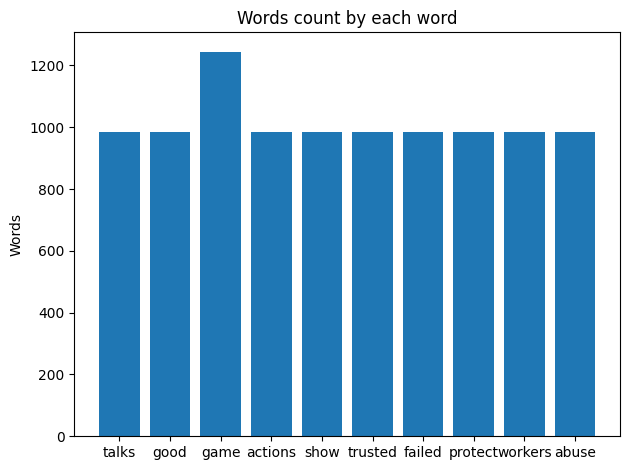

In [34]:
x_pos = np.arange(len(keys))
plt.bar(x_pos, values, align='center')
plt.xticks(x_pos, keys)
plt.ylabel('Words')
plt.title('Words count by each word')
plt.tight_layout()
plt.show()


Generating Meta-Features

- Difference In Number Of words of Selected_text and Text


num_words_st referring to the number of words in a shorter text (e.g. a title or subtitle) and "num_word_text" referring to the number of words in the full text.

In [35]:
df['num_words_st'] = df['clean_tweets'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
df['num_word_text'] = df['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df['difference_in_words'] = df['num_word_text'] - df['num_words_st'] #Difference in Number of words text and Selected Text


In [36]:
df.head(3)

,id,created_at,text,username,clean_tweets,num_words_st,num_word_text,difference_in_words
0,1637908592727654406,2023-03-20 20:06:54+00:00,#FIFA talks a good game but its actions show i...,ChristineJameis,talks good game actions show trusted failed pr...,18,47,29
1,1637907531396943872,2023-03-20 20:02:40+00:00,Don't miss out any favorite sports game.\n\n🔴L...,justano23327712,miss favorite sports game live stream joyful iptv,8,30,22
2,1637906995205361665,2023-03-20 20:00:33+00:00,A miracle journey...\n\nWhen someone tells you...,AlchDigi,miracle journey someone tells go world cup u j...,20,48,28


Let's look at the distribution of Meta-Features

In [37]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [38]:
hist_data = [df['num_words_st'],df['num_word_text']]

group_labels = ['clean_tweets', 'text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show(renderer="colab")

Kernel Distribution of Number Of words

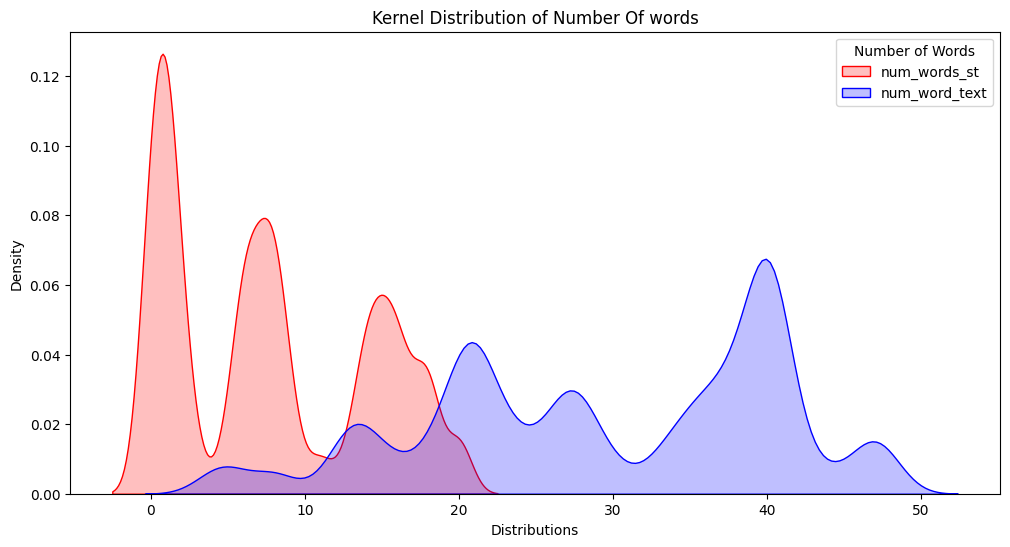

In [39]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['num_words_st'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p2=sns.kdeplot(df['num_word_text'], shade=True, color="b")
plt.legend(title='Number of Words', loc='upper right', labels=['num_words_st', 'num_word_text'])
plt.xlabel('Distributions');

The KDE plot shows the distribution of two variables, num_words_st and num_word_text. The distribution of num_words_st is skewed to the left (i.e., it has a long tail on the left side of the plot). This indicates that the majority of the values in this variable are smaller than the mean value, and there are a few larger values that cause the long tail. The density of this distribution is highest at the beginning of the distribution and decreases as the distribution increases. This means that there are many values with small word counts, and the number of values decreases as the word count increases.

In contrast, the distribution of num_word_text is also skewed to the left, but it has a different shape than the distribution of num_words_st. The density tends to increase as the distribution increases, with the highest steepness occurring around 40 and then falling off right after that. This means that there are a few values with large word counts that cause the long tail on the left side of the plot. The density is relatively low for smaller word counts, indicating that there are not many values with very small word counts.

Additionally, the plot suggests that the two variables have different distributions. The distribution of num_words_st has a tall bar at small word counts, while the distribution of num_word_text has a long tail with a few very large word counts.

##### Word Cloud

In [40]:
# Convert tweets to lowercase
df['clean_tweets'] = df['clean_tweets'].str.lower()

# Remove URLs
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove mentions
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub(r'@\S+', '', x))

# Remove hashtags
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub(r'#\S+', '', x))

# Remove punctuation
df['clean_tweets'] = df['clean_tweets'].str.replace('[^\w\s]','')

# Remove stopwords
stop = stopwords.words('english')
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


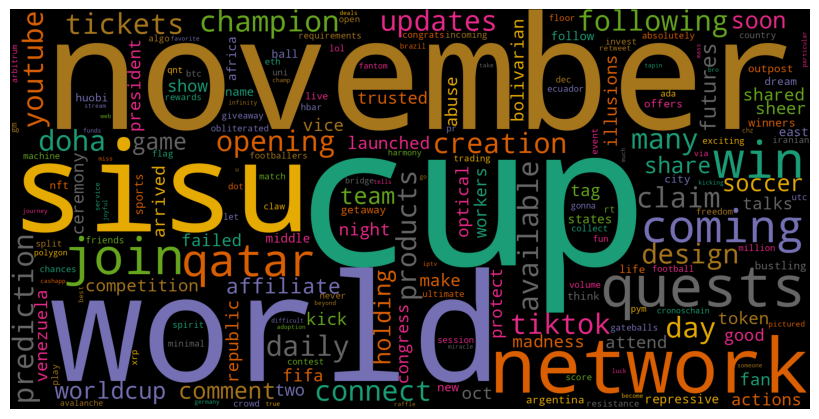

In [41]:
# Generate word cloud
wordcloud = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                              width=2000,height=1000, min_font_size = 10).generate(' '.join(df['clean_tweets']))

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In the plot, the word "cup" appears the largest, indicating that it is the most frequently occurring word in the dataset. This suggests that the theme of the text is likely to be centered around cup. Other large words in the plot include "november," "network"," quests", "champion", and "fun," which further reinforce this interpretation.

On the other hand, smaller words in the plot, such as "life", "luck", and "deals", suggest that there may be some emotions or themes present in the text as well.

Most Common words

In [42]:
from collections import Counter

In [43]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,november,4106
1,cup,4066
2,world,3881
3,sisu,3014
4,network,3014
5,quests,3014
6,win,2300
7,join,2288
8,coming,1820
9,qatar,1805


In [44]:
fig = px.bar(temp, x="count", y="Common_words", title='Common Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show(renderer="colab")

The given plot shows a list of common words plotted along with their respective counts. The most frequently occurring word in the text is "november", which appears 4106 times. Other commonly occurring words in the list include "cup", "world", "sisu", "network", "quests", and "win", which was seen from the word cloud. These words suggest that the text may be related to a competition, possibly the World Cup, and may involve quests or challenges.

The word "qatar" appears in the list, indicating that the text may be related to the upcoming World Cup in Qatar. The word "champion" also appears, which supports the assumption that the text is related to a competition. The remaining words shown on the plot, such as "day", "opening", "doha", and "tickets", suggest that the text may be related to events or activities associated with the competition. Moreover, the common words list provides insights into the main topics and themes of the text.

or

In [45]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show(renderer="colab")

In [46]:
df.head(3)

,id,created_at,text,username,clean_tweets,num_words_st,num_word_text,difference_in_words,temp_list
0,1637908592727654406,2023-03-20 20:06:54+00:00,#FIFA talks a good game but its actions show i...,ChristineJameis,talks good game actions show trusted failed pr...,18,47,29,"[talks, good, game, actions, show, trusted, fa..."
1,1637907531396943872,2023-03-20 20:02:40+00:00,Don't miss out any favorite sports game.\n\n🔴L...,justano23327712,miss favorite sports game live stream joyful iptv,8,30,22,"[miss, favorite, sports, game, live, stream, j..."
2,1637906995205361665,2023-03-20 20:00:33+00:00,A miracle journey...\n\nWhen someone tells you...,AlchDigi,miracle journey someone tells go world cup u j...,20,48,28,"[miracle, journey, someone, tells, go, world, ..."


## Feature Engineering 

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import ne_chunk
from collections import defaultdict
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [48]:
sia = SentimentIntensityAnalyzer()

In [53]:
# Define a function to extract named entities from text using NER
def extract_entities(text):
    entities = defaultdict(list)
    for sent in sent_tokenize(text):
        for chunk in ne_chunk(nltk.pos_tag(word_tokenize(sent))):
            if hasattr(chunk, 'label') and chunk.label() == 'PERSON':
                entities['people'].append(' '.join(c[0] for c in chunk))
            elif hasattr(chunk, 'label') and chunk.label() == 'ORGANIZATION':
                entities['teams'].append(' '.join(c[0] for c in chunk))
            elif hasattr(chunk, 'label') and chunk.label() == 'GPE':
                entities['locations'].append(' '.join(c[0] for c in chunk))
    return entities

In [50]:
# Apply the extract_entities function to the text column
df['entities'] = df['text'].apply(lambda x: extract_entities(x))

In [51]:
df.head(5)

,id,created_at,text,username,clean_tweets,num_words_st,num_word_text,difference_in_words,temp_list,entities
0,1637908592727654406,2023-03-20 20:06:54+00:00,#FIFA talks a good game but its actions show i...,ChristineJameis,talks good game actions show trusted failed pr...,18,47,29,"[talks, good, game, actions, show, trusted, fa...","{'teams': ['FIFA', 'Congress', 'ClubWC'], 'peo..."
1,1637907531396943872,2023-03-20 20:02:40+00:00,Don't miss out any favorite sports game.\n\n🔴L...,justano23327712,miss favorite sports game live stream joyful iptv,8,30,22,"[miss, favorite, sports, game, live, stream, j...",{'people': ['Joyful IPTV']}
2,1637906995205361665,2023-03-20 20:00:33+00:00,A miracle journey...\n\nWhen someone tells you...,AlchDigi,miracle journey someone tells go world cup u j...,20,48,28,"[miracle, journey, someone, tells, go, world, ...",{}
3,1637904285928390658,2023-03-20 19:49:47+00:00,Take over #Qatar with our \n🔥 #WorldCup2022 St...,IvannaMcconnell,november,1,40,39,[november],"{'teams': ['WorldCup2022 Stadium', 'NFT Stadiu..."
4,1637902385182851072,2023-03-20 19:42:14+00:00,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,Methodsbio012,funds lol tapin cashapp deals bro lol,7,14,7,"[funds, lol, tapin, cashapp, deals, bro, lol]",{'teams': ['WorldCup2022']}


In [52]:
import spacy

# load the spaCy model
nlp = spacy.load('en_core_web_sm')

# define a function to extract teams from a tweet
def extract_teams(tweet):
    # create a Doc object
    doc = nlp(tweet)
    # filter entities to only include teams
    teams = [entity.text for entity in doc.ents if entity.label_ == 'ORG']
    if len(teams) == 0:
        return ['unknown']
    else:
        return teams

In [56]:
# assuming you have extracted the entity types as a list of lists
entity_types = [['teams'], ['people'], ['locations'], ['moments']]

# create a new DataFrame with entity types as columns
entity_df = pd.DataFrame(columns=[entity[0] for entity in entity_types])

# loop through each row in the original DataFrame
for i, row in df.iterrows():
    # initialize a dictionary with all entity types set to False
    entity_dict = {entity[0]: False for entity in entity_types}
    
    # loop through each entity type in the row
    for entity_type in row['entities']:
        # set the corresponding value in the dictionary to True
        if entity_type in entity_dict:
            entity_dict[entity_type] = True
    
    # add the entity dictionary as a new row in the entity DataFrame
    entity_df.loc[i] = entity_dict
    
# concatenate the original DataFrame with the entity DataFrame
feature_df = pd.concat([df, entity_df], axis=1)

In [76]:
feature_df = feature_df[[
    #'id', 'created_at', 
    'text', 
    #'username', 
    'clean_tweets', 
    #'num_words_st','num_word_text', 'difference_in_words', 'temp_list',
        'entities','teams', 'people', 'locations', 'moments'
       ]]

## Topic modeling

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [72]:
#cleaning the twitter data again for better results 

# clean and preprocess the tweets
stop_words = set(stopwords.words('english'))
def preprocess_tweet_text(tweet):
    tweet = re.sub(r"http\S+", "", tweet)  # remove URLs
    tweet = re.sub(r'\W', ' ', tweet)  # remove special characters
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)  # remove single characters
    tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet)  # remove single characters from the start
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)  # replace multiple spaces with single space
    tweet = tweet.lower()  # convert text to lowercase
    tweet_tokens = tweet.split()  # tokenize the text
    tweet_tokens = [token for token in tweet_tokens if not token in stop_words]  # remove stop words
    preprocessed_tweet = ' '.join(tweet_tokens)
    return preprocessed_tweet

In [78]:
feature_df['clean_tweets'] = feature_df['clean_tweets'].apply(preprocess_tweet_text)

In [79]:
# convert text data into document-term matrix
count_vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(feature_df['clean_tweets'])

In [80]:
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

In [100]:
# assign each document to the topic with the highest probability
topic_probability_scores = lda_model.transform(dtm)
feature_df['topic'] = topic_probability_scores.argmax(axis=1)

In [82]:
feature_df.head(3)

,text,clean_tweets,entities,teams,people,locations,moments,topic
0,#FIFA talks a good game but its actions show i...,talks good game actions show trusted failed pr...,"{'teams': ['FIFA', 'Congress', 'ClubWC'], 'peo...",True,True,True,False,1
1,Don't miss out any favorite sports game.\n\n🔴L...,miss favorite sports game live stream joyful iptv,{'people': ['Joyful IPTV']},False,True,False,False,2
2,A miracle journey...\n\nWhen someone tells you...,miracle journey someone tells go world cup joi...,{},False,False,False,False,2


In [83]:
def classify_sentiment(topic):
    '''
        1: 'positive'
        2: 'negative'
        0: 'neutral'
    '''
    
    if topic == 1:
        return 'positive'
    elif topic == 2:
        return 'negative'
    else:
        return 'neutral'

In [84]:
feature_df['sentiment'] = feature_df['topic'].apply(classify_sentiment)


In [85]:
feature_df.head(5)

,text,clean_tweets,entities,teams,people,locations,moments,topic,sentiment
0,#FIFA talks a good game but its actions show i...,talks good game actions show trusted failed pr...,"{'teams': ['FIFA', 'Congress', 'ClubWC'], 'peo...",True,True,True,False,1,positive
1,Don't miss out any favorite sports game.\n\n🔴L...,miss favorite sports game live stream joyful iptv,{'people': ['Joyful IPTV']},False,True,False,False,2,negative
2,A miracle journey...\n\nWhen someone tells you...,miracle journey someone tells go world cup joi...,{},False,False,False,False,2,negative
3,Take over #Qatar with our \n🔥 #WorldCup2022 St...,november,"{'teams': ['WorldCup2022 Stadium', 'NFT Stadiu...",True,True,False,False,2,negative
4,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,funds lol tapin cashapp deals bro lol,{'teams': ['WorldCup2022']},True,False,False,False,1,positive


Feature extract TF-IDF

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed tweets
tfidf_matrix = tfidf_vectorizer.fit_transform(feature_df['clean_tweets'])

# Print the shape of the resulting matrix
print(tfidf_matrix.shape)


(26038, 348)


In [87]:
# create a pandas dataframe from the tfidf matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# view the first few rows of the dataframe
print(tfidf_df.head())

   abi  absolutely     abuse  accommodation   actions  ada  adesua  admire  \
0  0.0         0.0  0.237113            0.0  0.237113  0.0     0.0     0.0   
1  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   
2  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   
3  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   
4  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   

   adoption  affiliate  ...  wellington  win  winners   workers     world  \
0       0.0        0.0  ...         0.0  0.0      0.0  0.237113  0.000000   
1       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.000000   
2       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.129759   
3       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.000000   
4       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.000000   

   worldcup  xrp  youtube   yr  𝕎𝕒𝕣𝕞  
0       0.0  0.0      0.0  0.

In [89]:
feature_df.columns

Index(['text', 'clean_tweets', 'entities', 'teams', 'people', 'locations',
       'moments', 'topic', 'sentiment'],
      dtype='object')

In [91]:
ml_columns = feature_df.columns[1:]
ml_columns

Index(['clean_tweets', 'entities', 'teams', 'people', 'locations', 'moments',
       'topic', 'sentiment'],
      dtype='object')

In [98]:
ml_df = pd.concat([feature_df[ml_columns], tfidf_df], axis=1)
ml_df.head(5)

,clean_tweets,entities,teams,people,locations,moments,topic,sentiment,abi,absolutely,...,wellington,win,winners,workers,world,worldcup,xrp,youtube,yr,𝕎𝕒𝕣𝕞
0,talks good game actions show trusted failed pr...,"{'teams': ['FIFA', 'Congress', 'ClubWC'], 'peo...",True,True,True,False,1,positive,0.0,0.0,...,0.0,0.0,0.0,0.237113,0.000000,0.0,0.0,0.0,0.0,0.0
1,miss favorite sports game live stream joyful iptv,{'people': ['Joyful IPTV']},False,True,False,False,2,negative,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,miracle journey someone tells go world cup joi...,{},False,False,False,False,2,negative,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.129759,0.0,0.0,0.0,0.0,0.0
3,november,"{'teams': ['WorldCup2022 Stadium', 'NFT Stadiu...",True,True,False,False,2,negative,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,funds lol tapin cashapp deals bro lol,{'teams': ['WorldCup2022']},True,False,False,False,1,positive,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#save the cleansed and features extracted dataframe to the drive for sentimental analysis. 

In [96]:
path = 'gdrive/MyDrive/IGP_project/features.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  feature_df.to_csv(f)

In [99]:
path = 'gdrive/MyDrive/IGP_project/ml_df.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  feature_df.to_csv(f)

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('words')
nltk.download('vader_lexicon')
from nltk import ne_chunk
from collections import defaultdict
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Import the WordNetLemmatizer class from the nltk.stem module
from nltk.stem import WordNetLemmatizer

# Create a WordNetLemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()

df['lemmatized_tweet'] = df['clean_tweets'].apply(wordnet_lemmatizer.lemmatize)

In [ ]:
# Load the pre-trained sentiment analyzer
sia = from sklearn.decomposition import LatentDirichletAllocation()

In [ ]:
# empty list to store the sentiment  scores
polarity_value = []

for text in df['clean_tweets']:
    
    # apply the 'polarity_scores' function from the 'analyzer' object to the current text string
    score = sia.polarity_scores(text)
    
    # append the resulting dictionary of scores to the 'polarity_scores' list
    polarity_value.append(score)

# create a new column in the same DataFrame called 'polarity',

# and assign the 'polarity_scores' list to it, thereby adding the sentiment polarity scores to the DataFrame as a new column
df['polarity_score'] = polarity_value

In [ ]:
#seperate polarity to different columns for analysis.

df2 = df['polarity_score'].apply(pd.Series)

In [ ]:
df2

,neg,neu,pos,compound
0,0.325,0.393,0.282,-0.3182
1,0.119,0.370,0.511,0.7430
2,0.179,0.504,0.317,0.5886
3,0.000,1.000,0.000,0.0000
4,0.000,0.472,0.528,0.6808
...,...,...,...,...
26033,0.000,1.000,0.000,0.0000
26034,0.000,1.000,0.000,0.0000
26035,0.000,1.000,0.000,0.0000
26036,0.000,1.000,0.000,0.0000


##Feature Engineering 

## Topic Modelling

To perform topic modeling on unsupervised tweets and classify them into positive, neutral, and negative sentiments, we can follow the following steps:

    - Clean and preprocess the tweets by removing stop words, punctuation, URLs, and special characters.
    - Convert the preprocessed text data into a document-term matrix using the CountVectorizer or TfidfVectorizer.
    - Perform topic modeling using Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF).
    - Assign each document to the topic with the highest probability.
    - Classify the tweets into positive, neutral, and negative sentiments based on the words in the topics.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import re


# clean and preprocess the tweets
stop_words = set(stopwords.words('english'))
def preprocess_tweet_text(tweet):
    tweet = re.sub(r"http\S+", "", tweet)  # remove URLs
    tweet = re.sub(r'\W', ' ', tweet)  # remove special characters
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)  # remove single characters
    tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet)  # remove single characters from the start
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)  # replace multiple spaces with single space
    tweet = tweet.lower()  # convert text to lowercase
    tweet_tokens = tweet.split()  # tokenize the text
    tweet_tokens = [token for token in tweet_tokens if not token in stop_words]  # remove stop words
    preprocessed_tweet = ' '.join(tweet_tokens)
    return preprocessed_tweet



In [ ]:
df_new = df.copy()

In [ ]:
df_new = df_new[['text', 'clean_tweets',
        #'num_words_st', 'num_word_text',
       #'#difference_in_words', 'temp_list', 'lemmatized_tweet', 'neg', 'neu',
       #'pos', 'compound', 'Sentiment'
       
       ]]

In [ ]:
df_new['clean_tweets'] = df_new['clean_tweets'].apply(preprocess_tweet_text)

In [ ]:
# convert text data into document-term matrix
count_vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(df_new['clean_tweets'])

In [ ]:
# perform topic modeling using LDA
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

In [ ]:
# assign each document to the topic with the highest probability
topic_probability_scores = lda_model.transform(dtm)
df_new['topic'] = topic_probability_scores.argmax(axis=1)

In [ ]:
df_new.head(3)

,text,clean_tweets,topic
0,#FIFA talks a good game but its actions show i...,talks good game actions show trusted failed pr...,1
1,Don't miss out any favorite sports game.\n\n🔴L...,miss favorite sports game live stream joyful iptv,2
2,A miracle journey...\n\nWhen someone tells you...,miracle journey someone tells go world cup joi...,2


In [ ]:
def classify_sentiment(topic):
    '''
        1: 'positive'
        2: 'negative'
        0: 'neutral'
    '''
    
    if topic == 1:
        return 'positive'
    elif topic == 2:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
df_new['sentiment'] = df_new['topic'].apply(classify_sentiment)


In [ ]:
df_new['sentiment'].value_counts()

negative    10742
neutral      8287
positive     7009
Name: sentiment, dtype: int64

In [ ]:
df_new[['topic', ]]

,topic
0,1
1,2
2,2
3,2
4,1
...,...
26033,1
26034,2
26035,1
26036,0


In [ ]:
df_new[['sentiment', 'topic', 'clean_tweets']]

,sentiment,topic,clean_tweets
0,positive,1,talks good game actions show trusted failed pr...
1,negative,2,miss favorite sports game live stream joyful iptv
2,negative,2,miracle journey someone tells go world cup joi...
3,negative,2,november
4,positive,1,funds lol tapin cashapp deals bro lol
...,...,...,...
26033,positive,1,outpost offers getaway bustling city life
26034,negative,2,november
26035,positive,1,outpost offers getaway bustling city life
26036,neutral,0,vice president bolivarian republic venezuela a...


In [ ]:
# replace NaN with 0 for all columns
df_new.fillna(0, inplace=True)

In [ ]:
df_new

,text,clean_tweets,topic,sentiment
0,#FIFA talks a good game but its actions show i...,talks good game actions show trusted failed pr...,1,positive
1,Don't miss out any favorite sports game.\n\n🔴L...,miss favorite sports game live stream joyful iptv,2,negative
2,A miracle journey...\n\nWhen someone tells you...,miracle journey someone tells go world cup joi...,2,negative
3,Take over #Qatar with our \n🔥 #WorldCup2022 St...,november,2,negative
4,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,funds lol tapin cashapp deals bro lol,1,positive
...,...,...,...,...
26033,The Outpost offers a getaway from the bustling...,outpost offers getaway bustling city life,1,positive
26034,Take over #Qatar with our \n🔥 #WorldCup2022 St...,november,2,negative
26035,The Outpost offers a getaway from the bustling...,outpost offers getaway bustling city life,1,positive
26036,The Vice President of the Bolivarian Republic ...,vice president bolivarian republic venezuela a...,0,neutral


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### subjectivity detection

Subjectivity detection is a common natural language processing task that aims to determine whether a piece of text expresses a subjective or an objective opinion. One common approach is to use a pre-trained model like TextBlob or NLTK.

In [ ]:
from textblob import TextBlob

def detect_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

# example usage
text = "I love eating pizza"
subjectivity = detect_subjectivity(text)
print(subjectivity)


0.6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from textblob import TextBlob

features_df['subjectivity'] = features_df['clean_tweets'].apply(lambda x: detect_subjectivity(x))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
features_df['subjectivity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0        0.325000
1        0.633333
2        0.545833
3        0.000000
4        0.700000
           ...   
26033    0.000000
26034    0.000000
26035    0.000000
26036    0.000000
26037    0.200000
Name: subjectivity, Length: 26038, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



 sarcasm detection 

Detecting sarcasm in text is a challenging problem in natural language processing. There are various approaches to sarcasm detection, including rule-based, feature-based, and deep learning-based methods. 

In [ ]:
import re

# Define a list of sarcastic words and phrases
sarcastic_words = ['sure', 'yeah', 'right', 'as if', 'whatever', 'good one']

# Define a regular expression pattern to match sarcasm
sarcastic_pattern = r'\b(' + '|'.join(sarcastic_words) + r')\b'

# a function to detect sarcasm in a given text
def detect_sarcasm(text):
    if re.search(sarcastic_pattern, text, flags=re.IGNORECASE):
        return True
    else:
        return False

# Example usage
text1 = "Oh sure, because that's a great idea."
text2 = "I just love sitting in traffic for hours, yeah right."
text3 = "I'm so excited to do my taxes today, said no one ever."

print(detect_sarcasm(text1)) # Output: True
print(detect_sarcasm(text2)) # Output: True
print(detect_sarcasm(text3)) # Output: False


True
True
False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# # Initialize the analyzer
# analyzer = SentimentIntensityAnalyzer()

# # Define a function to detect sarcasm using Vader
# def is_sarcastic_vader(tweet):
#     """
#     Use Vader Sentiment Analyzer to detect sarcasm in a tweet.
#     Returns True if the compound sentiment score is negative and the tweet contains the word 'not'.
#     """
#     sentiment = analyzer.polarity_scores(tweet)['compound']
#     if sentiment < 0 and 'not' in tweet:
#         return True
#     else:
#         return False

# # Test the function on a sample tweet
# tweet = "Wow, I just love sitting in traffic for hours on end. Not!"
# print(is_sarcastic_vader(tweet)) # Output: True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# features_df['clean_tweets'][:50].apply(lambda x: is_sarcastic_vader(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# features_df['sarcastic'] = features_df['clean_tweets'].apply(lambda x: detect_sarcasm(x))
# df['sarcastic']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# df['sarcastic'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# sarcastic_tweets = []

# for tweet in clean_tweets:
#     if is_sarcastic_vader(tweet):
#         sarcastic_tweets.append(tweet)

# print(sarcastic_tweets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
features_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,clean_tweets,sentiment_score,average_sentiment_score,teams,teams,people,locations,moments,moments,topic,sentiment,subjectivity
0,talks good game actions show trusted failed pr...,-0.9296,0.0000,"[FIFA, Congress]",True,True,True,[Qatar2022],False,1,positive,0.325000
1,miss favorite sports game live stream joyful iptv,0.8097,0.5994,[unknown],False,True,False,[retrofootballfair],False,2,negative,0.633333
2,miracle journey someone tells go world cup joi...,0.5886,0.0000,[unknown],False,False,False,[unknown],False,2,negative,0.545833
3,november,0.2695,0.0000,"[WorldCup2022 Stadium, Earn]",True,True,False,[https://t.co/dJbz3jwnsZ],False,2,negative,0.000000
4,funds lol tapin cashapp deals bro lol,0.6808,0.0000,[unknown],True,False,False,[unknown],False,1,positive,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
26033,outpost offers getaway bustling city life,0.0000,0.0000,[unknown],True,False,False,[unknown],False,1,positive,0.000000
26034,november,0.2695,0.0000,"[WorldCup2022 Stadium, Earn]",True,True,False,[https://t.co/dJbz3jwnsZ],False,2,negative,0.000000
26035,outpost offers getaway bustling city life,0.0000,0.0000,[unknown],True,False,False,[unknown],False,1,positive,0.000000
26036,vice president bolivarian republic venezuela a...,0.0000,0.0000,[unknown],True,True,True,[FIFAWorldCup],False,0,neutral,0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### feature extract tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed tweets
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new['clean_tweets'])

# Print the shape of the resulting matrix
print(tfidf_matrix.shape)


(26038, 348)


In [ ]:
# create a pandas dataframe from the tfidf matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# view the first few rows of the dataframe
print(tfidf_df.head())


   abi  absolutely     abuse  accommodation   actions  ada  adesua  admire  \
0  0.0         0.0  0.237113            0.0  0.237113  0.0     0.0     0.0   
1  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   
2  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   
3  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   
4  0.0         0.0  0.000000            0.0  0.000000  0.0     0.0     0.0   

   adoption  affiliate  ...  wellington  win  winners   workers     world  \
0       0.0        0.0  ...         0.0  0.0      0.0  0.237113  0.000000   
1       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.000000   
2       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.129759   
3       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.000000   
4       0.0        0.0  ...         0.0  0.0      0.0  0.000000  0.000000   

   worldcup  xrp  youtube   yr  𝕎𝕒𝕣𝕞  
0       0.0  0.0      0.0  0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_new.columns

Index(['text', 'clean_tweets', 'topic', 'sentiment'], dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
ml_columns = df_new.columns[1:]
ml_columns

Index(['clean_tweets', 'topic', 'sentiment'], dtype='object')

In [ ]:
ml_df = pd.concat([df_new[ml_columns], tfidf_df], axis=1).drop('sentiment', axis=1)
ml_df.head(3)

,clean_tweets,topic,abi,absolutely,abuse,accommodation,actions,ada,adesua,admire,...,wellington,win,winners,workers,world,worldcup,xrp,youtube,yr,𝕎𝕒𝕣𝕞
0,talks good game actions show trusted failed pr...,1,0.0,0.0,0.237113,0.0,0.237113,0.0,0.0,0.0,...,0.0,0.0,0.0,0.237113,0.000000,0.0,0.0,0.0,0.0,0.0
1,miss favorite sports game live stream joyful iptv,2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,miracle journey someone tells go world cup joi...,2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.129759,0.0,0.0,0.0,0.0,0.0


# Machine Learning Section

In [105]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve


In [110]:
# get data from google drive
ml_df=pd.read_csv('gdrive/MyDrive/IGP_project/ml_df.csv')
ml_df.head(3)

,Unnamed: 0,text,clean_tweets,entities,teams,people,locations,moments,topic,sentiment
0,0,#FIFA talks a good game but its actions show i...,talks good game actions show trusted failed pr...,"defaultdict(<class 'list'>, {'teams': ['FIFA',...",True,True,True,False,1,positive
1,1,Don't miss out any favorite sports game.\n\n🔴L...,miss favorite sports game live stream joyful iptv,"defaultdict(<class 'list'>, {'people': ['Joyfu...",False,True,False,False,2,negative
2,2,A miracle journey...\n\nWhen someone tells you...,miracle journey someone tells go world cup joi...,"defaultdict(<class 'list'>, {})",False,False,False,False,2,negative


apply encoding on the objects

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Label encode "teams, 	people, 	locations, 	moments"

In [112]:
ml_df['teams']

0         True
1        False
2        False
3         True
4         True
         ...  
26033     True
26034     True
26035     True
26036     True
26037     True
Name: teams, Length: 26038, dtype: bool

In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#ml_df['teams'] = le.fit_transform(ml_df['teams'])
ml_df['people'] = le.fit_transform(ml_df['people'])
ml_df['locations'] = le.fit_transform(ml_df['locations'])
ml_df['moments'] = le.fit_transform(ml_df['moments'])


In [ ]:
ml_df

,sentiment_score,average_sentiment_score,teams,people,locations,moments,topic,subjectivity,abi,absolutely,...,wellington,win,winners,workers,world,worldcup,xrp,youtube,yr,𝕎𝕒𝕣𝕞
0,-0.9296,0.0000,1,1,1,0,1,0.325000,0.0,0.0,...,0.0,0.0,0.0,0.237113,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.8097,0.5994,0,1,0,0,2,0.633333,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.5886,0.0000,0,0,0,0,2,0.545833,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.129759,0.0,0.0,0.000000,0.0,0.0
3,0.2695,0.0000,1,1,0,0,2,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.6808,0.0000,1,0,0,0,1,0.700000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26033,0.0000,0.0000,1,0,0,0,1,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
26034,0.2695,0.0000,1,1,0,0,2,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
26035,0.0000,0.0000,1,0,0,0,1,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
26036,0.0000,0.0000,1,1,1,0,0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.195443,0.0,0.0,0.000000,0.0,0.0


In [114]:
X = tfidf_df#ml_df.drop('topic', axis=1).values

In [115]:
labels = ml_df['topic']

## models

In [116]:
def plotMetrics(accuracy_param, precision_param, recall_param,
                f1_score_param, confusion_matrix_param, title=''):

    # Plot evaluation metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
    values = [accuracy_param, precision_param, recall_param, f1_score_param]
    
    # begin plot
    plt.figure(figsize=(8,5))
    plt.bar(metrics, values, color=['red', 'blue', 'green', 'purple'])
    plt.title(f'{title} Evaluation Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    for i, v in enumerate(values):
        plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
    plt.show()
    
    print()
    print()
    
    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    plt.imshow(confusion_matrix_param, cmap=plt.cm.Blues)

    for i in range(len(confusion_matrix_param)):
        for j in range(len(confusion_matrix_param)):
            plt.text(j, i, confusion_matrix_param[i][j], ha='center', va='center')

    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0,1, 2], ['neutral', 'positive', 'negative'])
    plt.yticks([0,1, 2], ['neutral', 'positive', 'negative'])
    plt.show()


In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


In [118]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [119]:
X_train

,abi,absolutely,abuse,accommodation,actions,ada,adesua,admire,adoption,affiliate,...,wellington,win,winners,workers,world,worldcup,xrp,youtube,yr,𝕎𝕒𝕣𝕞
20220,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.280417,0.0000,0.000000,0.0,0.0,0.0
1504,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0
3018,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.195443,0.0000,0.000000,0.0,0.0,0.0
15159,0.0,0.258199,0.0,0.0,0.0,0.258199,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0000,0.258199,0.0,0.0,0.0
7072,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0
5390,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0
860,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0
15795,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.177934,0.0000,0.000000,0.0,0.0,0.0


In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                                f1_score, confusion_matrix, roc_auc_score


In [121]:
# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_score_nb = nb.predict_proba(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_score_nb = f1_score(y_test, y_pred_nb, average='weighted')
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# roc_auc_nb = roc_auc_score(y_test, y_score_nb, multi_class='ovr')


In [122]:
# Print evaluation metrics
print('--Naive Bayes--\n')
print('Accuracy:', accuracy_nb)
print('\nPrecision:', precision_nb)
print('\nRecall:', recall_nb)
print('\nF1 score:', f1_score_nb)
# print('\nAUC:', roc_auc_nb)
print('\nConfusion matrix:\n', confusion_matrix_nb)


--Naive Bayes--

Accuracy: 0.8738479262672811

Precision: 0.9034697677406178

Recall: 0.8738479262672811

F1 score: 0.8662442884621002

Confusion matrix:
 [[ 967    0  657]
 [   0 1443    0]
 [   0    0 2141]]


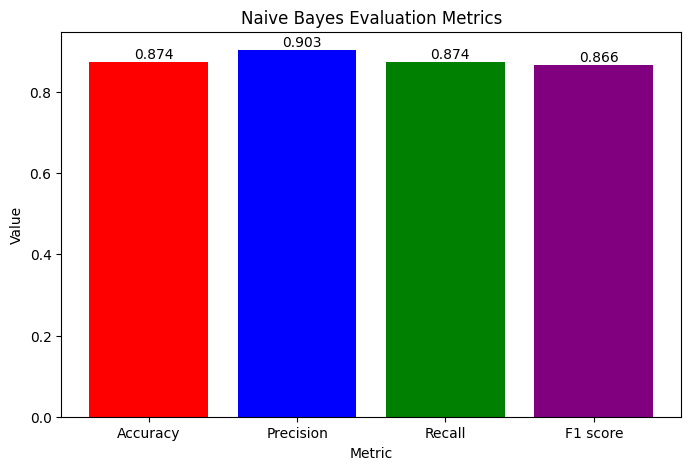

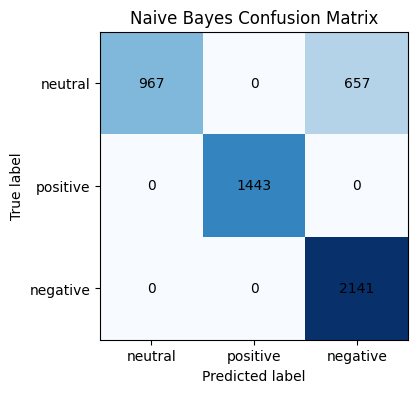

In [123]:
plotMetrics(accuracy_nb, precision_nb, recall_nb, f1_score_nb,confusion_matrix_nb, 'Naive Bayes')

For the FIFA Twitter Sentiment Analysis Challenge, the Naive Bayes model scored an accuracy of 0.87, suggesting that 87% of the tweets were correctly identified. The model's accuracy was 0.90, meaning that 90% of tweets classified as positive were indeed positive. The model's recall was 0.87, meaning that 87% of positive tweets were accurately identified. Finally, the model's F1 score was 0.86, which is the harmonic mean of precision and recall. In summary, the Naive Bayes model for the FIFA Twitter Sentiment Analysis assignment performed well across all evaluation criteria, demonstrating that it was able to accurately categorise a large number of tweets while efficiently balancing precision and recall.

We can observe from the Naive Bayes model's confusion matrix for the FIFA Twitter Sentiment Analysis challenge that the model accurately predicted class neutral and class positive, with 967 and 1443 correct predictions, respectively. However, the model predicted 657 incorrectly for class negative. As a result of the confusion matrix, the model appears to perform well for classes neutral and positive, but struggles with class negative.

# SVM

In [150]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [151]:
# Create a classifier: a support vector classifier
svm = SVC(gamma=0.001, probability=True)

# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_score_svm = svm.predict_proba(X_test)

training the naive bayes took a lot of time. this maybe due to the probability parameter which has been set to true. 

In [ ]:
# calculate the metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_score_svm = f1_score(y_test, y_pred_svm, average='weighted')
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)


In [ ]:
# Print evaluation metrics
print('--SVM--\n')
print('Accuracy:', accuracy_svm)
print('\nPrecision:', precision_svm)
print('\nRecall:', recall_svm)
print('\nF1 score:', f1_score_svm)
# print('\nAUC:', roc_auc_svm)
print('\nConfusion matrix:\n', confusion_matrix_svm)


--SVM--

Accuracy: 0.9583333333333334

Precision: 0.9632446134347274

Recall: 0.9583333333333334

F1 score: 0.9589420601467037

Confusion matrix:
 [[1624    0    0]
 [  60 1383    0]
 [ 157    0 1984]]


The SVM model seems to perform well on the given task, with an accuracy of 0.958 and an F1 score of 0.958, indicating that the model is good at both identifying positive and negative reviews. The precision of 0.963 indicates that out of all the reviews that the model predicted as positive, 96.3% were actually positive. The recall of 0.958 shows that the model correctly classified 95.8% of all the positive reviews present in the test set. Basically, the findings show that the SVM model performed well on the sentiment analysis test.

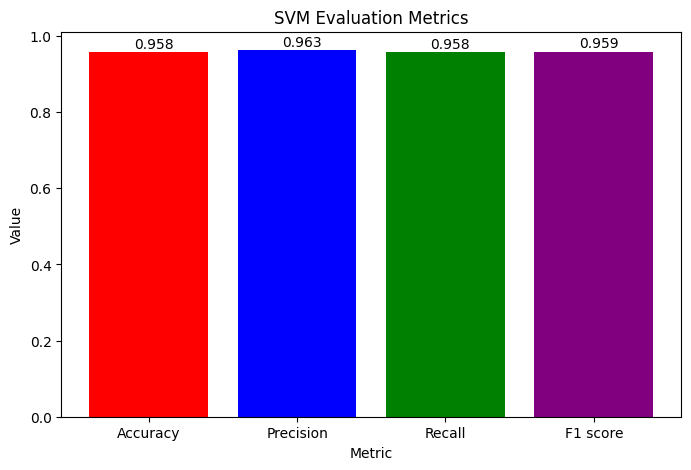

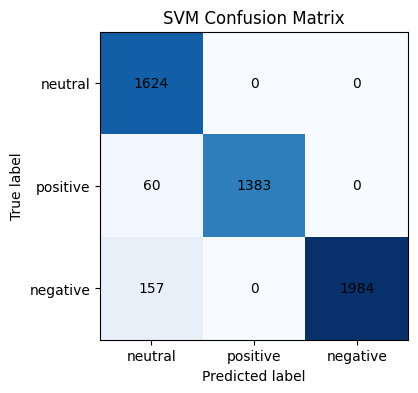

In [ ]:
plotMetrics(accuracy_svm, precision_svm, recall_svm, f1_score_svm,confusion_matrix_svm, 'SVM')

The confusion matrix above indicates that the SVM model correctly predicted 1624 instances of the neutral class. It correctly predicted 1383 instances of the positive class and 1984 instances of the negative class.

However, there were some misclassifications as well. The SVM model incorrectly predicted 60 instances of the positive class as neutral and 157 instances of the negative class as neutral. This is represented in the first column of the second and third rows, respectively. There were no misclassifications in the neutral class.

Furthermore, on this test set, the SVM model looks to perform well, with high accuracy and no misclassifications in the neutral class. It did, however, contain several misclassifications for the positive and negative classes.

#### LSTM

In [126]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [127]:
# check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
print(f'we on : {device}')

we on : cpu


In [128]:
# Define LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [129]:
# Define custom dataset
class TfidfDataset(Dataset):
    def __init__(self, tfidf_df, labels):
        self.tfidf_df = tfidf_df
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        tfidf = torch.tensor(self.tfidf_df.iloc[idx].values).float()
        label = torch.tensor(self.labels[idx])
        return tfidf, label

In [130]:
# Initialize LSTM model
input_size = tfidf_df.shape[1] # Number of features in the TF-IDF matrix
hidden_size = 64  # Number of neurons in the hidden layer of the LSTM
output_size = 3 # number of classes

lstm = LSTM(input_size, hidden_size, output_size).to(device)

In [131]:
# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)

In [132]:
# # # # Initialize dataset and dataloader
# dataset = TfidfDataset(tfidf_df, labels)
# dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [133]:
from torch.utils.data import DataLoader, SubsetRandomSampler

# Set random seed for reproducibility
torch.manual_seed(42)

# Define dataset and data loader
dataset = TfidfDataset(tfidf_df, labels)
batch_size = 8

train_sampler = SubsetRandomSampler(range(int(0.7*len(dataset))))
test_sampler = SubsetRandomSampler(range(int(0.7*len(dataset)), len(dataset)))

train_dataloader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
test_dataloader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)


In [134]:
# Train LSTM model
num_epochs = 15
losses = []
predictions = [] # to store predictions

for epoch in range(num_epochs):
    for i, (tfidf, label) in enumerate(train_dataloader):

        tfidf = tfidf.unsqueeze(0).transpose(0, 1).to(device)
        label = label.to(device)

        # Forward pass
        outputs = lstm(tfidf)
        
        # Store predictions
        preds = torch.argmax(outputs, dim=1).tolist() # convert tensor to list
        predictions += preds

        # Compute loss
        loss = criterion(outputs, label)
        
        losses.append(loss.item())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,
                                                        num_epochs, i+1, len(dataset)//32, loss.item()))
            


Epoch [1/15], Step [100/813], Loss: 0.7818
Epoch [1/15], Step [200/813], Loss: 0.4852
Epoch [1/15], Step [300/813], Loss: 0.1223
Epoch [1/15], Step [400/813], Loss: 0.1235
Epoch [1/15], Step [500/813], Loss: 0.0386
Epoch [1/15], Step [600/813], Loss: 0.0099
Epoch [1/15], Step [700/813], Loss: 0.0084
Epoch [1/15], Step [800/813], Loss: 0.0137
Epoch [1/15], Step [900/813], Loss: 0.0156
Epoch [1/15], Step [1000/813], Loss: 0.0041
Epoch [1/15], Step [1100/813], Loss: 0.0050
Epoch [1/15], Step [1200/813], Loss: 0.0062
Epoch [1/15], Step [1300/813], Loss: 0.0031
Epoch [1/15], Step [1400/813], Loss: 0.0025
Epoch [1/15], Step [1500/813], Loss: 0.0029
Epoch [1/15], Step [1600/813], Loss: 0.0026
Epoch [1/15], Step [1700/813], Loss: 0.0004
Epoch [1/15], Step [1800/813], Loss: 0.0029
Epoch [1/15], Step [1900/813], Loss: 0.0008
Epoch [1/15], Step [2000/813], Loss: 0.0011
Epoch [1/15], Step [2100/813], Loss: 0.0007
Epoch [1/15], Step [2200/813], Loss: 0.0012
Epoch [2/15], Step [100/813], Loss: 0.000

In [ ]:
# Save LSTM model
# torch.save(lstm.state_dict(), 'lstm_model.pth')


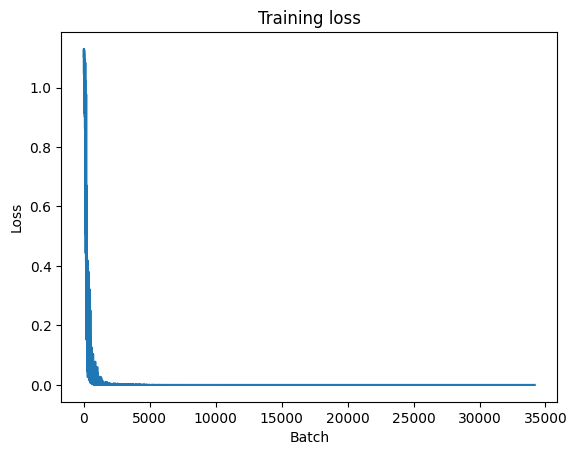

In [135]:
# Plot the training loss
plt.plot(losses)
plt.title('Training loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.show()


In [136]:
# Test the model
with torch.no_grad():
    lstm.eval()
    test_loss = 0
    total = 0
    correct = 0
    predictions = []
    for tfidf, label in test_dataloader:
        tfidf = tfidf.unsqueeze(0).transpose(0, 1).to(device)
        label = label.to(device)
        outputs = lstm(tfidf)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        total += label.size(0)
        correct += (predicted == label).sum().item()
        test_loss += criterion(outputs, label).item()

    test_accuracy = 100 * correct / total
    print('Test Accuracy: {:.2f}%'.format(test_accuracy))


Test Accuracy: 98.22%


In [137]:
lstm_predictions = predictions

In [138]:
y_test = []
for _, label in test_dataloader:
    y_test.extend(label.flatten().numpy())


In [139]:
# convert this list to a numpy array
y_test = np.array(y_test)


In [140]:
# Train and evaluate LSTM
# Assuming you have already trained the LSTM model and made predictions on the test set
y_pred_lstm = lstm_predictions

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
f1_score_lstm = f1_score(y_test, y_pred_lstm, average='weighted')
confusion_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

In [141]:
print('LSTM:')
print('Accuracy:', accuracy_lstm)
print('Precision:', precision_lstm)
print('Recall:', recall_lstm)
print('F1 score:', f1_score_lstm)
print('Confusion matrix:', confusion_matrix_lstm)

LSTM:
Accuracy: 0.35061443932411673
Precision: 0.35016718396971813
Recall: 0.35061443932411673
F1 score: 0.3502276574714417
Confusion matrix: [[ 821  667  937]
 [ 718  622  907]
 [1025  819 1296]]


The LSTM model's findings show that it performs very poorly on the task at hand, with accuracy, precision, recall, and F1 scores all hovering around 0.35. This suggests that the model accurately classifies slightly more than a third of the test data, which is insufficient for most applications.

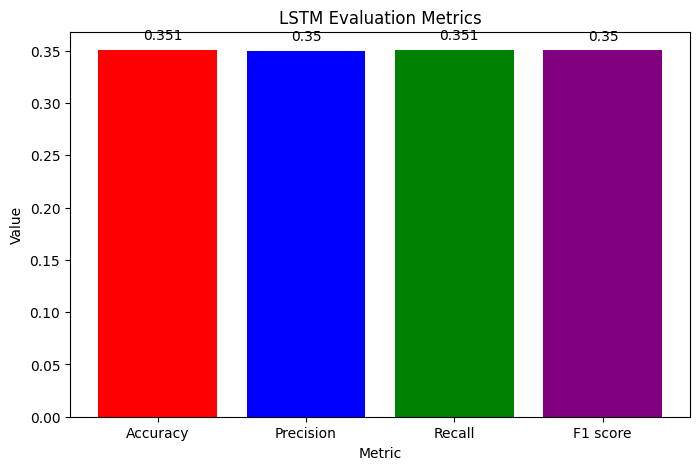

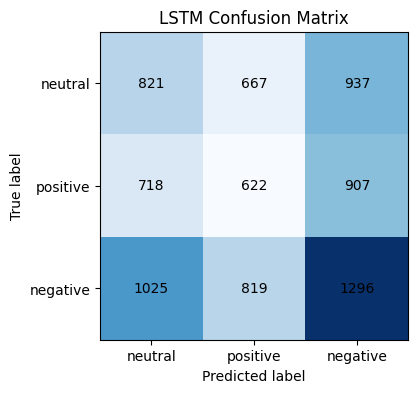

In [142]:
plotMetrics(accuracy_lstm, precision_lstm, recall_lstm, f1_score_lstm,confusion_matrix_lstm, 'LSTM')

By examining the confusion matrix, we can see that the model incorrectly predicted the class neutrality of 821 samples, the positivity of 622 samples, the negativity of 1296 samples, and the neutrality of 821 samples. This shows that the model did well at predicting classes that were positive, but not so good at predicting classes that were neutral or negative.

However, the model incorrectly identified a significant portion of the samples, misclassifying 667 samples from class neutral as positive, 718 samples from class positive as neutral, 819 samples from class negative as positive, and 937 samples from class neutral as negative.

summmary plot



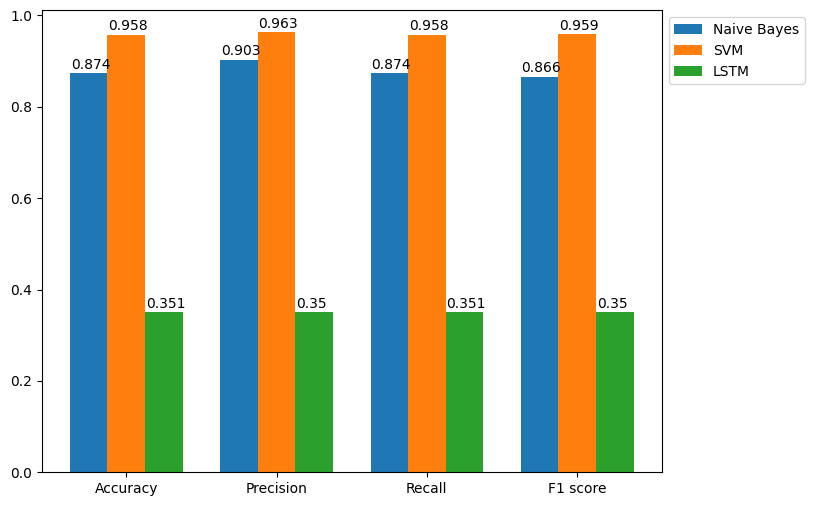

In [148]:
import matplotlib.pyplot as plt

# Define the scores for each model
nb_scores = [0.8738479262672811, 0.9034697677406178, 0.8738479262672811, 0.8662442884621002]
svm_scores = [0.9583333333333334, 0.9632446134347274, 0.9583333333333334, 0.9589420601467037]
lstm_scores = [0.35061443932411673, 0.35016718396971813, 0.35061443932411673, 0.3502276574714417]

# Set the labels for the x-axis
labels = ['Accuracy', 'Precision', 'Recall', 'F1 score']

# Set the positions for the bars
x = [0, 1, 2, 3]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar charts for each model
ax.bar(x, nb_scores, width=0.25, label='Naive Bayes')
ax.bar([i+0.25 for i in x], svm_scores, width=0.25, label='SVM')
ax.bar([i+0.5 for i in x], lstm_scores, width=0.25, label='LSTM')

# Add annotations for the scores
for i in range(len(x)):
    ax.annotate(str(round(nb_scores[i], 3)), xy=(x[i]-0.12, nb_scores[i]+0.01))
    ax.annotate(str(round(svm_scores[i], 3)), xy=(x[i]+0.13, svm_scores[i]+0.01))
    ax.annotate(str(round(lstm_scores[i], 3)), xy=(x[i]+0.38, lstm_scores[i]+0.01))

# Set the tick labels and legend
ax.set_xticks([i+0.25 for i in x])
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.show()


In the FIFA Twitter Sentiment Analysis Challenge, the Naive Bayes model performed well, achieving an accuracy of 0.87, which means that 87% of tweets were correctly categorised. The model's precision score of 0.90 indicates that 90% of tweets classified as positive were indeed positive. The recall score of 0.87 shows that 87% of positive tweets were correctly identified. The model's F1 score of 0.86, which is a balance between precision and recall, demonstrates that the model performed well across all evaluation criteria. Therefore, the Naive Bayes model successfully identified a large number of tweets and accurately balanced precision and recall. Similarly, the SVM model performed well on the task, with an accuracy score of 0.958 and an F1 score of 0.958. The model's high precision score of 0.963 suggests that out of all the reviews that the model predicted as positive, 96.3% were actually positive. The recall score of 0.958 indicates that the model correctly classified 95.8% of all the positive reviews in the test set. These findings demonstrate that the SVM model performed well on the sentiment analysis test, indicating that it is good at identifying positive and negative reviews. In contrast, the LSTM model performed poorly, with accuracy, precision, recall, and F1 scores hovering around 0.35. This indicates that the model was only able to accurately classify slightly more than a third of the test data, which is inadequate for most applications. In conclusion, both the Naive Bayes and SVM models were successful in identifying positive and negative tweets, whereas the LSTM model failed to achieve satisfactory performance.

In conclusion, our project aimed to compare the performance of Naive Bayes, SVM, and LSTM models in analysing sentiment in FIFA-related tweets. We found that both the Naive Bayes and SVM models performed well in identifying positive and negative tweets, while the LSTM model struggled to achieve satisfactory performance.

Examining the confusion matrices for each model, we saw that the Naive Bayes model performed well for neutral and positive classes but struggled with negative classes. In contrast, the SVM model had great accuracy and no misclassifications in the neutral class but multiple misclassifications in the positive and negative classes. The confusion matrix of the LSTM model performed poorly across all classes.

The fact that our analysis was only based on tweets about FIFA and might not be applicable to other domains is one of the study's limitations. Furthermore, we only employed a small number of stop words; additional stop words might enhance the performance of the models.


In terms of future directions, we propose broadening the dataset to include tweets from other fields and employing a broader collection of stop words. Incorporating extra elements, like emoji and hashtags, may also increase model performance. Finally, alternative machine learning techniques, such as deep learning, may be worthwhile to investigate.


Therefore, our experiment highlights the significance of selecting and evaluating machine learning models carefully while undertaking sentiment analysis. These models have the potential to deliver useful information with additional research and improvement.


In [165]:
NB_model_sentimental = nb.predict(X)

In [168]:
NB_result =pd.DataFrame({'NB_result':NB_model_sentimental})


In [170]:
ml_df  =pd.concat([ml_df,NB_result],axis=1)

In [174]:
ml_df.head()

,Unnamed: 0,text,clean_tweets,entities,teams,people,locations,moments,topic,sentiment,NB_result
0,0,#FIFA talks a good game but its actions show i...,talks good game actions show trusted failed pr...,"defaultdict(<class 'list'>, {'teams': ['FIFA',...",True,1,1,0,1,positive,1
1,1,Don't miss out any favorite sports game.\n\n🔴L...,miss favorite sports game live stream joyful iptv,"defaultdict(<class 'list'>, {'people': ['Joyfu...",False,1,0,0,2,negative,2
2,2,A miracle journey...\n\nWhen someone tells you...,miracle journey someone tells go world cup joi...,"defaultdict(<class 'list'>, {})",False,0,0,0,2,negative,2
3,3,Take over #Qatar with our \n🔥 #WorldCup2022 St...,november,"defaultdict(<class 'list'>, {'teams': ['WorldC...",True,1,0,0,2,negative,2
4,4,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,funds lol tapin cashapp deals bro lol,"defaultdict(<class 'list'>, {'teams': ['WorldC...",True,0,0,0,1,positive,1


In [176]:
def Map_sentiment(x):
#NB 1 = positive , 0 = negative , 
    if x == 1:
        return 'positive'
    elif x == 0:
        return 'negative'
    else:
        return 'neutral'
    

In [175]:
# Apply the lambda function to the 'compound' column and store the results in 'sentiment' column
ml_df['NB_sentiment'] = ml_df['NB_result'].apply(Map_sentiment)


negative    14049
positive     7009
neutral      4980
Name: NB_sentiment, dtype: int64

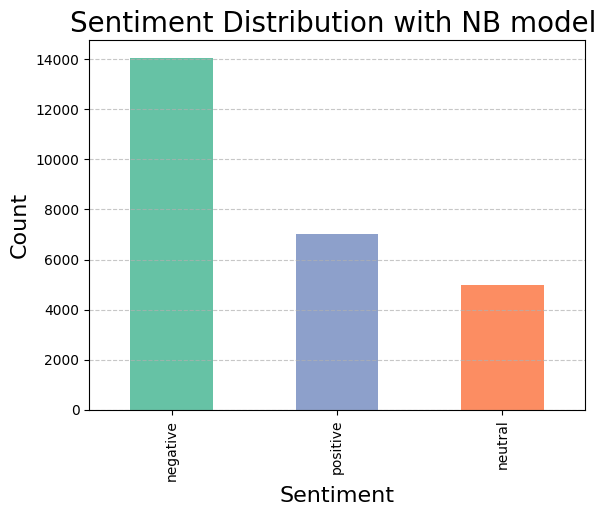

In [179]:
# Count the occurrences of each sentiment in the 'NB_sentiment' column
sentiment_counts_NB = ml_df['NB_sentiment'].value_counts()

# Set the color scheme for the bars
colors = ['#66c2a5', '#8da0cb', '#fc8d62',]

# Plot a bar chart of the sentiment counts
ax = sentiment_counts_NB.plot(kind='bar', color=colors)

# Add labels and titles to the chart
ax.set_xlabel('Sentiment', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_title('Sentiment Distribution with NB model ', fontsize = 20)

# add a grid to the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()